In [90]:
from sklearn.datasets import make_classification,make_moons
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

In [91]:
N = 20

In [92]:
X,y = make_moons(n_samples=N,noise=0.5)

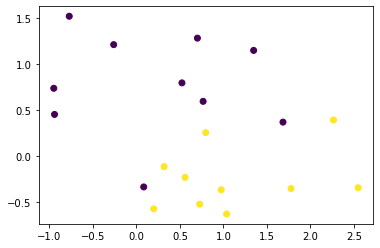

In [93]:
plt.scatter(X[:,0],X[:,1],c=y);

In [94]:
from sklearn.tree import DecisionTreeClassifier

In [95]:
t_0 = DecisionTreeClassifier()
t_0.fit(X,y)

DecisionTreeClassifier()

In [96]:
def plot_decision_boundary(data,labels,clf):
    plot_step = 0.02
    x_min, x_max = data[:,0].min() -1, data[:,0].max() + 1
    y_min,y_max = data[:,1].min() -1 , data[:,1].max() + 1

    xx,yy = np.meshgrid(np.arange(x_min,x_max,plot_step),
                   np.arange(y_min,y_max,plot_step))
    Z = clf.predict(np.c_[xx.ravel(),yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx,yy,Z,cmap='cool')

    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Decision Boundary')

    plt.scatter(data[:,0],data[:,1],c=labels,cmap='hot',s=100)
    plt.show()

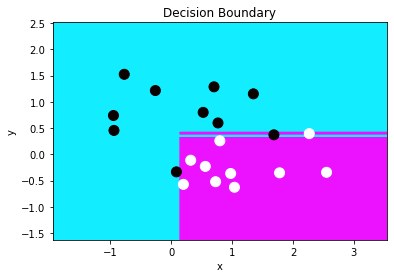

In [97]:
plot_decision_boundary(X,y,t_0)

In [98]:
def make_boot_strapped_tree():
    sample = np.random.choice(range(N),N)
    X_resampled = X[sample]
    y_resampled = y[sample]
    t = DecisionTreeClassifier()
    t.fit(X_resampled,y_resampled)
    return t

In [99]:
sample = np.random.choice(range(N),N)
X[sample]

array([[ 0.79713942,  0.25831832],
       [ 0.76681401,  0.59843856],
       [-0.9421215 ,  0.45589074],
       [-0.2617538 ,  1.21528469],
       [-0.9421215 ,  0.45589074],
       [-0.77298211,  1.52432486],
       [ 0.70109525,  1.28612455],
       [ 0.72721908, -0.52021335],
       [ 0.55875978, -0.2292196 ],
       [-0.9421215 ,  0.45589074],
       [ 0.08372448, -0.33296841],
       [-0.77298211,  1.52432486],
       [ 0.70109525,  1.28612455],
       [ 0.70109525,  1.28612455],
       [ 0.08372448, -0.33296841],
       [ 0.76681401,  0.59843856],
       [ 1.6853692 ,  0.37232452],
       [ 2.55003422, -0.3416993 ],
       [ 1.77795837, -0.35099665],
       [ 0.52346069,  0.79931257]])

In [100]:
np.random.choice(range(N),N)

array([10,  6,  1,  1,  6,  0,  2, 13, 19,  8, 18,  3,  9,  5, 13, 11,  2,
       19, 10, 16])

In [107]:
t = make_boot_strapped_tree()

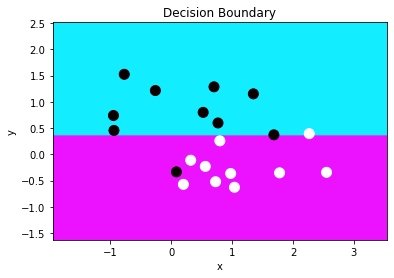

In [108]:
plot_decision_boundary(X,y,t)

In [109]:
class bt_clf():
    
    def __init__(self,T):
        self.T = T
        
    def predict(self,X):
        p = np.array([t.predict(X) for t in self.T])
        return np.array([Counter(p_).most_common(1)[0][0] for p_ in p.T])


In [113]:
T = [make_boot_strapped_tree() for _ in range(50)]

In [114]:
b = bt_clf(T)

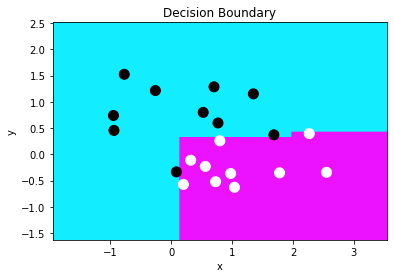

In [115]:
plot_decision_boundary(X,y,b)

In [80]:
from sklearn.ensemble import BaggingClassifier

In [83]:
bt = BaggingClassifier(t_0,n_estimators=50)

In [84]:
bt.fit(X,y)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=50)

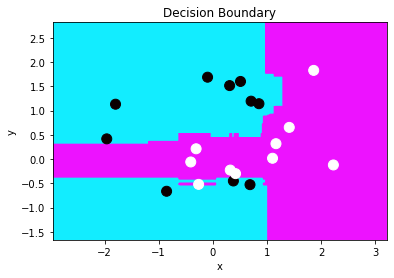

In [85]:
plot_decision_boundary(X,y,bt)

In [86]:
t = make_boot_strapped_tree()

In [87]:
import graphviz
from sklearn import tree

In [88]:
dot_data = tree.export_graphviz(t,out_file=None)
graph = graphviz.Source(dot_data)
graph.render('tree_3')

'tree_3.pdf'

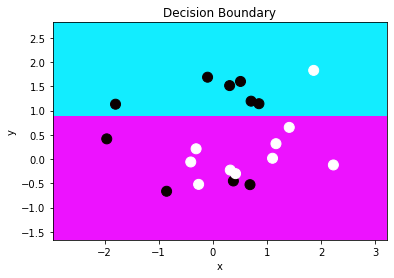

In [89]:
plot_decision_boundary(X,y,t)

In [116]:
def make_boot_strapped_tree_and_samples():
    sample = np.random.choice(range(N),N)
    X_resampled = X[sample]
    y_resampled = y[sample]
    t = DecisionTreeClassifier()
    t.fit(X_resampled,y_resampled)
    return t, sample

In [117]:
 S = np.array([make_boot_strapped_tree_and_samples() for _ in range(5)],dtype=object)

In [118]:
samples = S[:,1]

In [119]:
samples

array([array([ 9,  3,  3, 12, 13,  7, 17, 14,  5, 17,  4,  2, 11,  6,  5,  3,  6,
              10, 18, 12])                                                       ,
       array([ 4,  5,  3, 12,  3, 11, 13,  2, 11, 18, 15, 14,  9,  3,  9, 17,  6,
               1, 19,  4])                                                       ,
       array([ 2, 13,  9, 10,  8,  7,  6,  0,  1, 10, 11,  3, 17, 14,  4,  8, 14,
               6, 19, 11])                                                       ,
       array([18, 14, 19, 18, 19,  6, 19, 15, 18,  8,  8,  8, 17, 15, 12, 11,  4,
               7, 15, 12])                                                       ,
       array([ 6,  4,  5,  4,  5, 17,  6, 14, 17,  3, 12,  6, 13,  2, 16, 19,  2,
              16,  0, 12])                                                       ],
      dtype=object)

In [120]:
predictions = []
for i in range(N):
    for j in range(5):
        if i not in S[:,1][j]:
            predictions.append([i,j,S[:,0][j].predict([X[i]]).item(),y[i]])            

In [121]:
predictions = np.array(predictions)

In [122]:
predictions

array([[ 0,  0,  1,  1],
       [ 0,  1,  1,  1],
       [ 0,  3,  1,  1],
       [ 1,  0,  0,  1],
       [ 1,  3,  0,  1],
       [ 1,  4,  0,  1],
       [ 2,  3,  1,  1],
       [ 3,  3,  0,  0],
       [ 5,  2,  1,  0],
       [ 5,  3,  1,  0],
       [ 7,  1,  0,  0],
       [ 7,  4,  0,  0],
       [ 8,  0,  0,  1],
       [ 8,  1,  0,  1],
       [ 8,  4,  0,  1],
       [ 9,  3,  0,  0],
       [ 9,  4,  0,  0],
       [10,  1,  0,  0],
       [10,  3,  0,  0],
       [10,  4,  0,  0],
       [11,  4,  1,  1],
       [12,  2,  1,  1],
       [13,  3,  0,  0],
       [15,  0,  0,  1],
       [15,  2,  1,  1],
       [15,  4,  0,  1],
       [16,  0,  0,  0],
       [16,  1,  0,  0],
       [16,  2,  0,  0],
       [16,  3,  0,  0],
       [18,  2,  1,  1],
       [18,  4,  1,  1],
       [19,  0,  0,  0]], dtype=int64)

In [123]:
correct_pred = predictions[[i for i in range(len(predictions)) if predictions[i][2] == predictions[i][3]]]

In [126]:
oob_score = 0.0
for i in range(N):
    pred_i = predictions[predictions[:,0] == i]
    n = len(pred_i)

    m = len(pred_i[pred_i[:,2] == pred_i[:,3]])
    if n != 0:
        oob_score+=m/(n*N)
    


In [127]:
oob_score

0.6166666666666667

In [75]:
[[S[i,0].predict(X) for i in range(5)][j][k] for j in range(5) for k in range(20)] 

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1]

In [ ]:
d1 = X[np.random.choice(range(N),N)]

In [ ]:
d1

In [ ]:
def make_bootstrap_sample():
    sample = np.random.choice(range(N),N)
    X_resampled = X[sample]
    y_resampled = y[sample]
    return [(x,y) for x,y in zip(X_resampled,y_resampled)]

In [ ]:
bootstrap_sample = make_bootstrap_sample()

In [ ]:
depth = 3

In [ ]:
features = np.random.choice([0,1],depth)

In [ ]:
features

In [ ]:
def gini_index(nd):
    label_0 = [x for x in nd if x[1]==0]
    label_1 = [ x for x in nd if x[1] == 1]
    m = len(nd)
    m_0 = len(label_0)
    m_1 = len(label_1)
    return 2 * (m_0/m) * (m_1/m)
    

In [ ]:
gini_index(bootstrap_sample)

In [ ]:
def split_gini_index(split,node):
    L = [ x for x in node if x[0][split[0]] >= split[1]]
    R = [ x for x in node if x[0][split[0]] < split[1]]
    if len(L) == 0 or len(R) == 0:
        return 0
    else:
        return (len(L)/len(node))*gini_index(L) + (len(R)/len(node))*gini_index(R)

In [ ]:
splits = [[1,x[0][1]] for x in bootstrap_sample]

In [ ]:
splits

In [ ]:
for split in splits:
    gi = []
    gi.append(split_gini_index(split,bootstrap_sample))
min(gi)

In [ ]:
splits[1]